In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sat_utils
import math
import zipfile

In [2]:
z1 = zipfile.ZipFile('Data/Compacted Data Set1.zip','r')
z2 = zipfile.ZipFile('Data/Compacted Data Set2.zip','r')

In [3]:
data1 = pd.read_csv(z1.open('Data/Compacted Data Set1.csv'))
data2 = pd.read_csv(z2.open('Data/Compacted Data Set2.csv'))
data = pd.concat((data1,data2)).reset_index(drop=True)

## Pulling the DataFrames

In [4]:
data = data.replace([np.inf, -np.inf],np.nan)

## Plotting the Images
---

In [5]:
var_sets = [['B02','B03','B04'],['B05'],['B06'],['B07'],['B08'],['B8A'],['B09'],['B11'],['B12'],['Elevation'],['MSI'],['CRE'],
            ['EVI'],['NDVI'],['GNDVI'],['MCARI'],['LAI'],['CC Green','CC Red','CC Blue'],['PSRI']]
plot_type = ['Scatter','Scatter','Scatter','Scatter','Scatter','Scatter','Scatter','Scatter','Scatter','Scatter','Scatter',
             'Scatter','Scatter','Scatter','Scatter','Scatter','Scatter','Scatter','Scatter']
incl_range = ['n/a','n/a','n/a','n/a','n/a','n/a','n/a','n/a','n/a','n/a',[0,.99],'n/a',[0.05,0.95],[0.015,1],[0.01,1],[0,0.99],'n/a','n/a','n/a']
#var_scalers = [False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,False,True]
var_factors = [3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,255,3.5,3.5,100,125,125,15,0.5,3.5,3.5]
charting_params = pd.DataFrame({'Sets':var_sets,'Plot Type':plot_type,'Range':incl_range,'Factors':var_factors})#,'Scaler':var_scalers,'Factor':var_factors})

In [6]:
charting_params

,Sets,Plot Type,Range,Factors
0,"[B02, B03, B04]",Scatter,n/a,3.5
1,[B05],Scatter,n/a,3.5
2,[B06],Scatter,n/a,3.5
3,[B07],Scatter,n/a,3.5
4,[B08],Scatter,n/a,3.5
5,[B8A],Scatter,n/a,3.5
6,[B09],Scatter,n/a,3.5
7,[B11],Scatter,n/a,3.5
8,[B12],Scatter,n/a,3.5
9,[Elevation],Scatter,n/a,255.0


## Plotting the Raw Image as well as all bands and derived indeces

In [ ]:
fig, ax = plt.subplots(1)
fig.set_size_inches(15,15)
ax.scatter(data['j'],data['i'],c=np.clip(data[charting_params['Sets'][0]].values*charting_params['Factors'][0]/255,*(0,1)),s=1)
ax.set_title('Original Satellite Image',fontsize=20)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.axis('equal')
fig.savefig('Satellite Report Image_OR.png')

#### If you run the 2 cells below, be prepared to wait

In [ ]:
r = 3
fig, ax = plt.subplots(3,r)
fig.set_size_inches(50, 50)
for i in range(1,10):
    print(charting_params['Sets'][i])
    v = list(charting_params['Sets'][i])
    if len(v) > 1:
        ax[int(math.floor((i-1)/r)),(i-1)%r].scatter(data['j'],data['i'],c=np.clip(data[v].values*charting_params['Factors'][i]/255,*(0,1)),s=1)
        ax[int(math.floor((i-1)/r)),(i-1)%r].set_title(v,fontsize=50)
        ax[int(math.floor((i-1)/r)),(i-1)%r].xaxis.set_visible(False)
        ax[int(math.floor((i-1)/r)),(i-1)%r].yaxis.set_visible(False)
        ax[int(math.floor((i-1)/r)),(i-1)%r].axis('equal')
    else:
        v = v[0]
        qs = charting_params['Range'][i]
        if type(qs) == list:
            temp_frame = data[data[v].between(data[v].quantile(qs[0]),data[v].quantile(qs[1]))]
            if v == 'Elevation':
                ax[int(math.floor((i-1)/r)),(i-1)%r].scatter(temp_frame['j'],temp_frame['i'],c=temp_frame[v].values,s=1)
            else:
                ax[int(math.floor((i-1)/r)),(i-1)%r].scatter(temp_frame['j'],temp_frame['i'],c=np.clip(temp_frame[v].values*charting_params['Factors'][i]/255,*(0,1)),s=1)
            ax[int(math.floor((i-1)/r)),(i-1)%r].set_title(v,fontsize=50)
            ax[int(math.floor((i-1)/r)),(i-1)%r].xaxis.set_visible(False)
            ax[int(math.floor((i-1)/r)),(i-1)%r].yaxis.set_visible(False)
            ax[int(math.floor((i-1)/r)),(i-1)%r].axis('equal')
        else:
            if v == 'Elevation':
                ax[int(math.floor((i-1)/r)),(i-1)%r].scatter(data['j'],data['i'],c=data[v].values,s=1)
            else:
                ax[int(math.floor((i-1)/r)),(i-1)%r].scatter(data['j'],data['i'],c=np.clip(data[v].values*charting_params['Factors'][i]/255,*(0,1)),s=1)
            ax[int(math.floor((i-1)/r)),(i-1)%r].set_title(v,fontsize=50)
            ax[int(math.floor((i-1)/r)),(i-1)%r].xaxis.set_visible(False)
            ax[int(math.floor((i-1)/r)),(i-1)%r].yaxis.set_visible(False)
            ax[int(math.floor((i-1)/r)),(i-1)%r].axis('equal')
        
fig.tight_layout()
fig.savefig('First Nine Figures Report Image_OR.png')

In [ ]:
r = 3
fig, ax = plt.subplots(3,r)
fig.set_size_inches(50, 50)
for i in range(10,charting_params.shape[0]):
    print(charting_params['Sets'][i])
    v = list(charting_params['Sets'][i])
    if len(v) > 1:
        ax[int(math.floor((i-10)/r)),(i-10)%r].scatter(data['j'],data['i'],c=np.clip(data[v].values*charting_params['Factors'][i]/255,*(0,1)),s=1)
        ax[int(math.floor((i-10)/r)),(i-10)%r].set_title(v,fontsize=50)
        ax[int(math.floor((i-10)/r)),(i-10)%r].xaxis.set_visible(False)
        ax[int(math.floor((i-10)/r)),(i-10)%r].yaxis.set_visible(False)
        ax[int(math.floor((i-10)/r)),(i-10)%r].axis('equal')
    else:
        v = v[0]
        qs = charting_params['Range'][i]
        if type(qs) == list:
            temp_frame = data[data[v].between(data[v].quantile(qs[0]),data[v].quantile(qs[1]))]
            if v == 'Elevation':
                ax[int(math.floor((i-10)/r)),(i-10)%r].scatter(temp_frame['j'],temp_frame['i'],c=temp_frame[v].values,s=1)
            else:
                ax[int(math.floor((i-10)/r)),(i-10)%r].scatter(temp_frame['j'],temp_frame['i'],c=np.clip(temp_frame[v].values*charting_params['Factors'][i]/255,*(0,1)),s=1)
            ax[int(math.floor((i-10)/r)),(i-10)%r].set_title(v,fontsize=50)
            ax[int(math.floor((i-10)/r)),(i-10)%r].xaxis.set_visible(False)
            ax[int(math.floor((i-10)/r)),(i-10)%r].yaxis.set_visible(False)
            ax[int(math.floor((i-10)/r)),(i-10)%r].axis('equal')
        else:
            if v == 'Elevation':
                ax[int(math.floor((i-10)/r)),(i-10)%r].scatter(data['j'],data['i'],c=data[v].values,s=1)
            else:
                ax[int(math.floor((i-10)/r)),(i-10)%r].scatter(data['j'],data['i'],c=np.clip(data[v].values*charting_params['Factors'][i]/255,*(0,1)),s=1)
            ax[int(math.floor((i-10)/r)),(i-10)%r].set_title(v,fontsize=50)
            ax[int(math.floor((i-10)/r)),(i-10)%r].xaxis.set_visible(False)
            ax[int(math.floor((i-10)/r)),(i-10)%r].yaxis.set_visible(False)
            ax[int(math.floor((i-10)/r)),(i-10)%r].axis('equal')
        
fig.tight_layout()
fig.savefig('Second Nine Figures Report Image_OR.png')

## Removing Outliers

Since the outliers were so extreme in some of the features that the normal color range wouldn't show up in the image plottings, I think it's likely that these will negatively impact the clustering algorithm as well. Therefore, I will remove them according to the same parameters used to plot them above.

In [10]:
low_ends = []
high_ends = []
set_names = []
#loop through the charting params to record what the max and min for each field should be
for i in range(charting_params.shape[0]):
    if type(charting_params['Range'][i]) == list:
        low_ends.append(data[charting_params['Sets'][i][0]].quantile(charting_params['Range'][i][0]))
        high_ends.append(data[charting_params['Sets'][i][0]].quantile(charting_params['Range'][i][1]))
        set_names.append(charting_params['Sets'][i][0])

In [11]:
outlier_params = pd.DataFrame({'Set':set_names,'Low End':low_ends,'High End':high_ends})

In [12]:
outlier_params

,Set,Low End,High End
0,MSI,0.000000,1.169492
1,EVI,-40.555556,39.285714
2,NDVI,0.396226,1.000000
3,GNDVI,0.333333,1.000000
4,MCARI,-16.545455,44.000000


In [13]:
subset_data = data.copy()
for i in range(outlier_params.shape[0]):
    subset_data = subset_data[subset_data[outlier_params['Set'][i]].between(outlier_params['Low End'][i],outlier_params['High End'][i])]

In [14]:
print(data.shape)
print(subset_data.shape)
print("Data Loss of: "+str((data.shape[0]-subset_data.shape[0])/data.shape[0]))

(617754, 35)
(535601, 35)
Data Loss of: 0.13298659336888147


13.3% of the data is not a small ammount to lose. However, given the nature of complexity in satellite imagery, I think there is a good chance these outliers may be due to errors in the data collecting process. After all, the data is getting gathered from space! Also, the data is collected through means of using data from multiple days and picking the best parts in order to have an overall picture with the least ammount of cloud coverage. This may also be a source of the outliers, because things like overall infrared values may differ by day.<br>
Another thing to consider is that having such outliers in the data will likely lower the quality of clusters in the remaining 86.7% of the data due to the increased range in values. This can be seen in the differences between the distributions before and after removing the outliers, as shown below. <br>
What I have stated above is only my opinion on the source of the outliers, and figuring out the true source of these outliers would be better suited for a satellite imagery expert.

# Feature Distributions

In [15]:
features = ['B02','B03','B04','B05','B06','B07','B08','B8A','B09','B11','B12','Elevation','MSI','CRE',
            'EVI','NDVI','GNDVI','MCARI','LAI','CC Red','CC Green','CC Blue','PSRI']

### Distributions WITH outliers

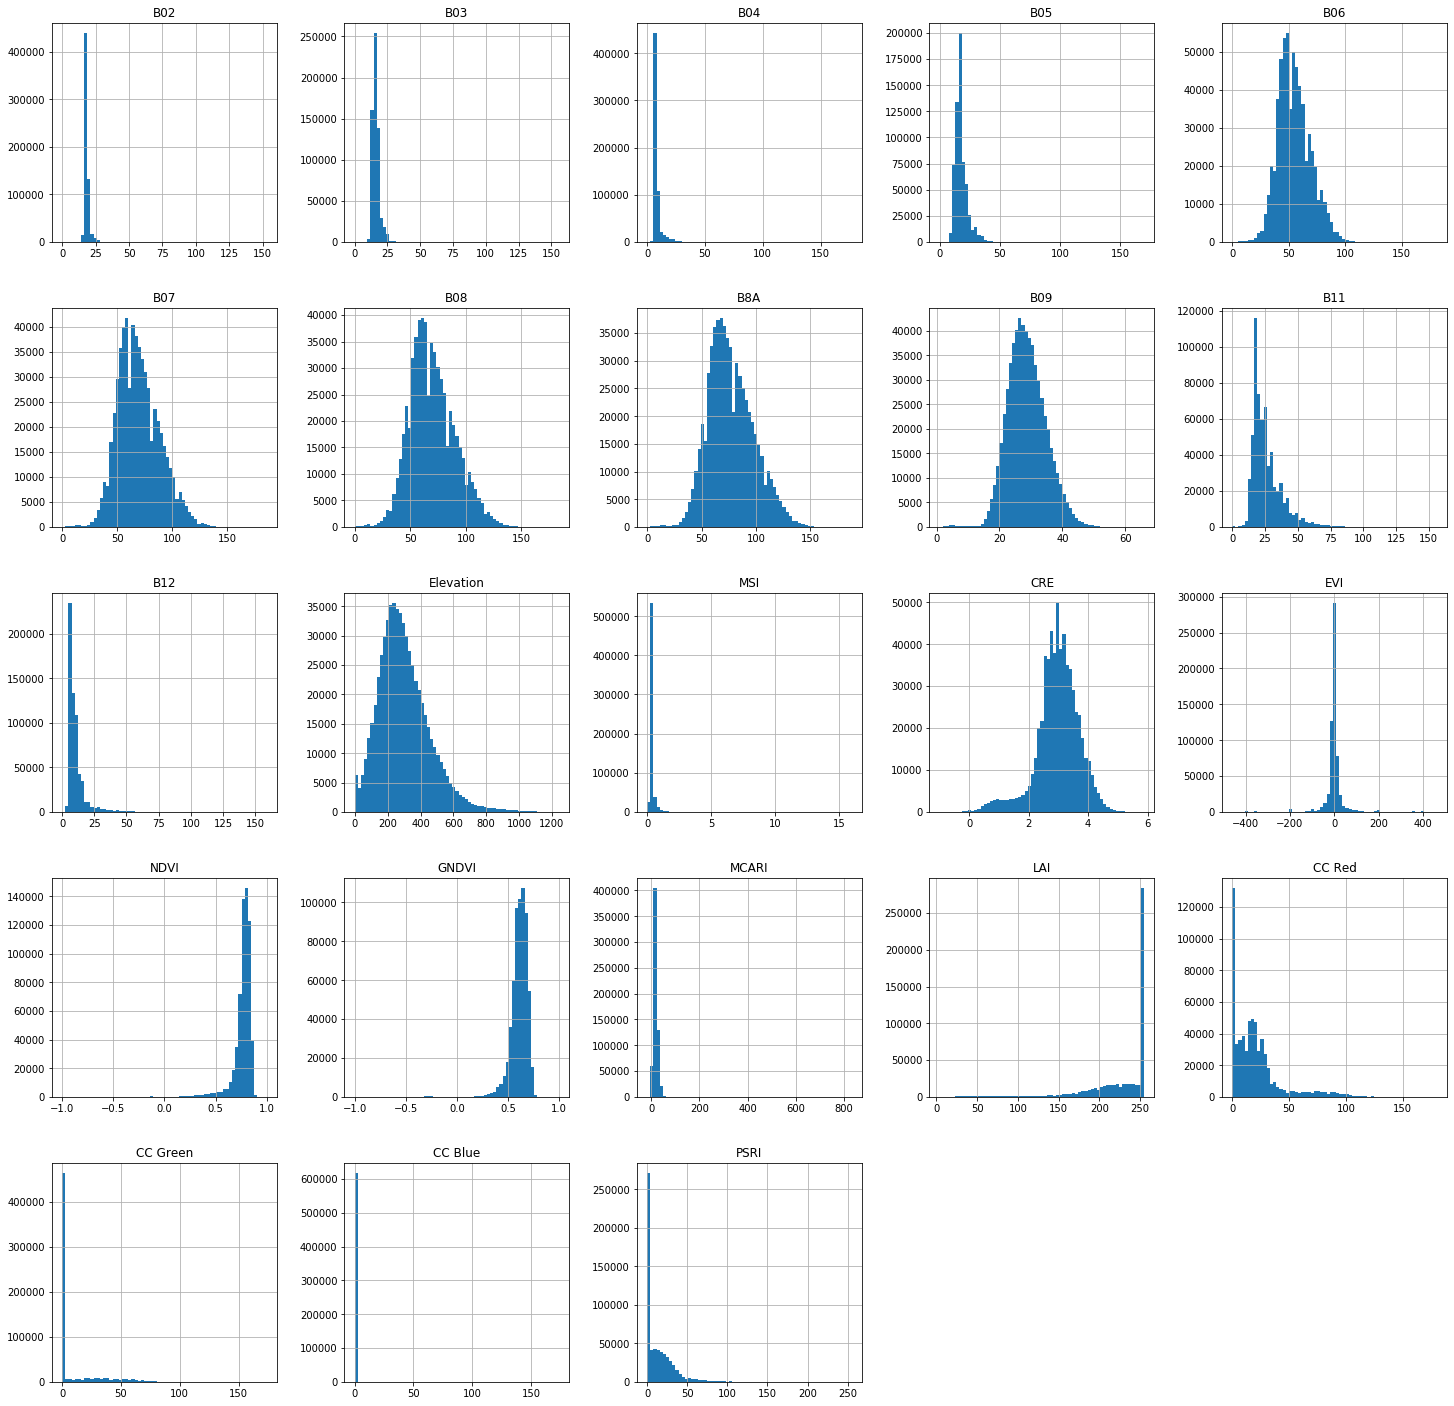

In [16]:
data[features].hist(figsize=(25,25),bins=65)
plt.savefig('Distributions Outliers.png')

### Distributions WITHOUT outliers

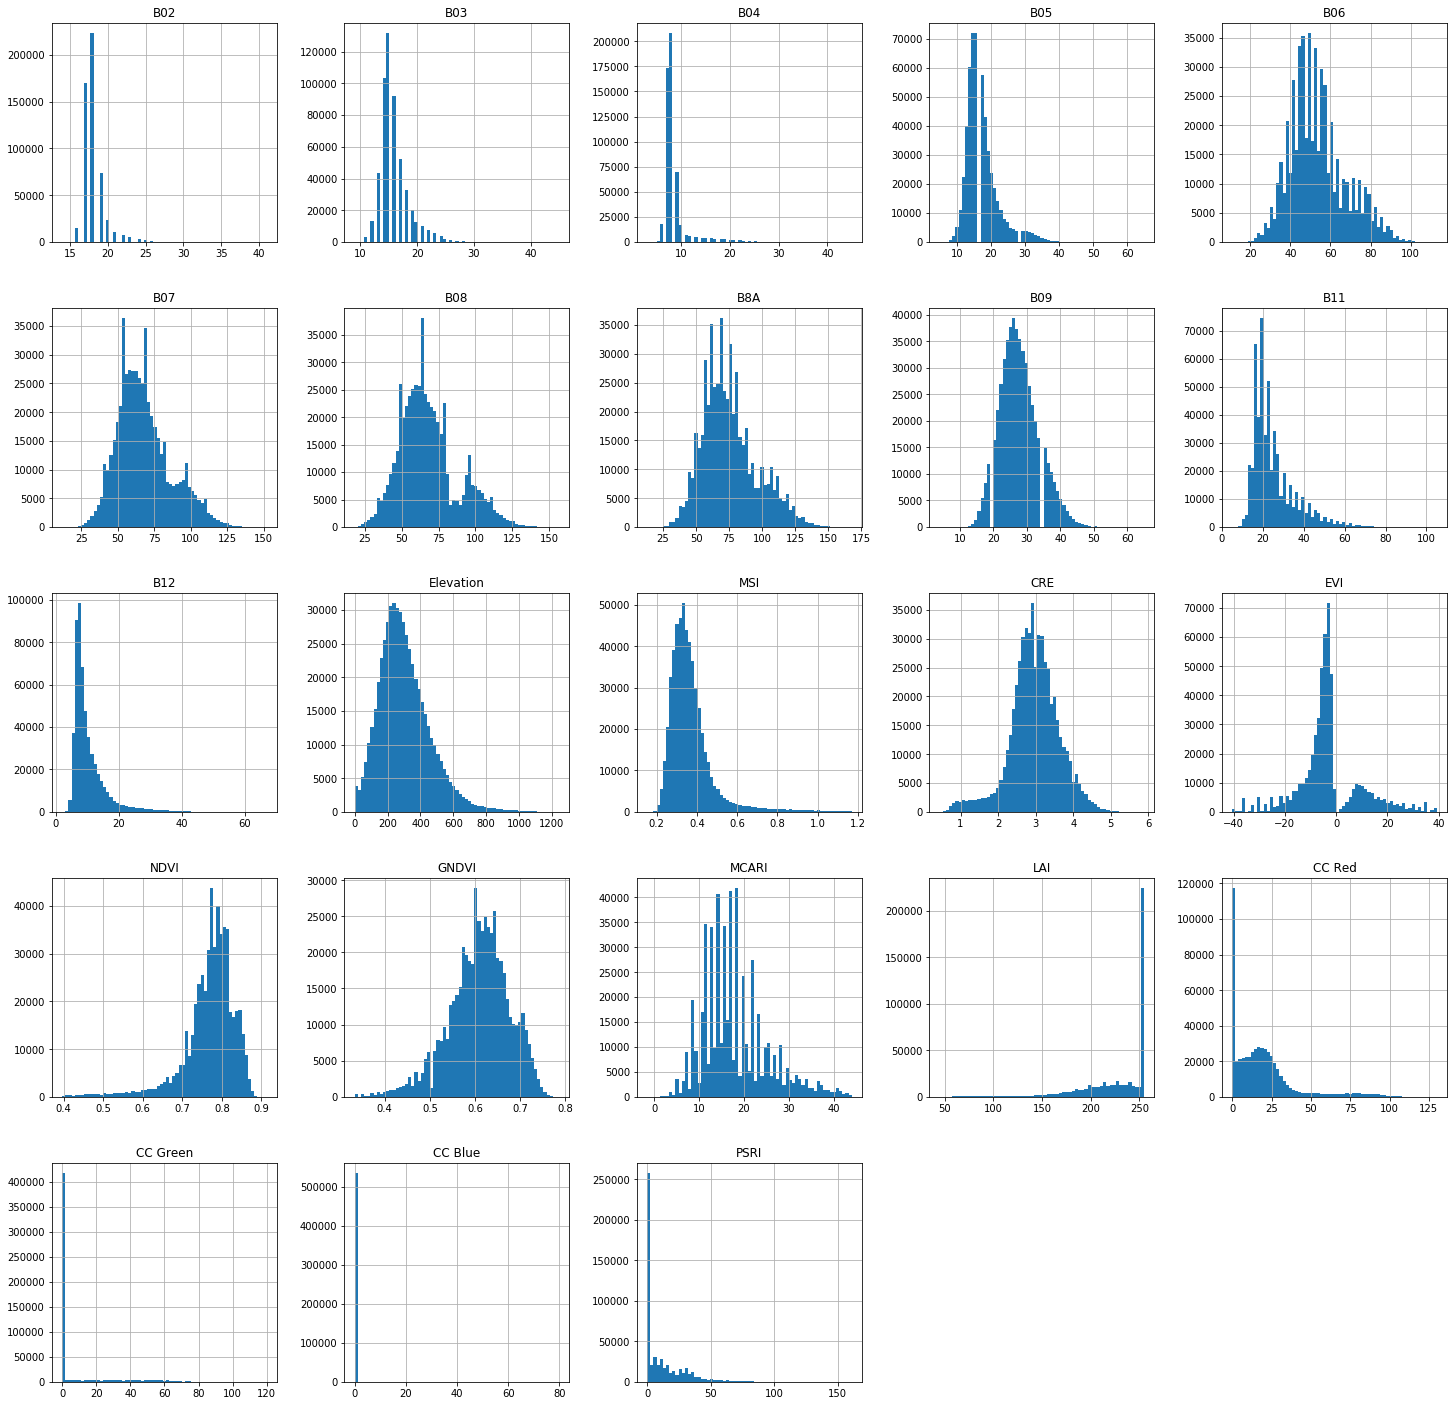

In [17]:
subset_data[features].hist(figsize=(25,25),bins=65)
plt.savefig('Distributions No Outliers.png')

Comparing between the two sets of histograms, the true distributions of many of the features can be seen much more clearly. For example B07, B08, and B8A actually have sizeable humps to the right of the modes, suggesting a smaller separate cluster of values. Even more obvious is the difference in EVI's distribution. When looking at the histogram of EVI with outliers, it looks normally distributed with very long tails on either side, but after taking out the outliers, we can clearly see that EVI is bi-modal!<br>
I think that the removal of these outliers will be helpful for the clustering algorithm to pick out clusters.

#### Other Notes: <br>
- The distribution of CC Blue (color corrected values of blue) only takes on a value of 0 - I will remove this feature from this analysis.<br>
- There are high densities on certain ends of the range of values for some of the features. For example, LAI (leaf area index) has a high density of pixels with a value of 255, CC Red, CC Green, and PSRI all have a concentration of pixels with values of 0. This seems odd to me, and I can't figure out what may cause this. This is something that more subject-area expertise would be needed for - for this project, I will proceed without making any adjustments.<br>
- The blue, green, and red values (B02, B03, and B04 respectively) show multiple 'spikes' on either side of the distribution. I interpret these as miniature clusters of color values present in an overarching uni-modal distribution. I think these may be useful in the clustering algorithm.

Below is an example of the 'spikes' present in the color value distributions (green in this example).

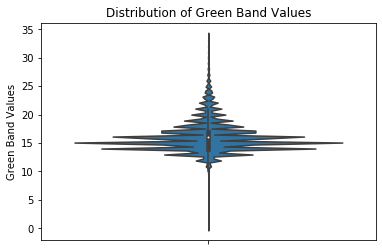

In [18]:
fig,ax=plt.subplots(1)
ax = sns.violinplot(y=data['B03'][data['B03']<35])
ax.set_title('Distribution of Green Band Values')
ax.set_ylabel('Green Band Values')
fig.savefig('Green Bands.png')

Below shows the bi-modal distributions up-close

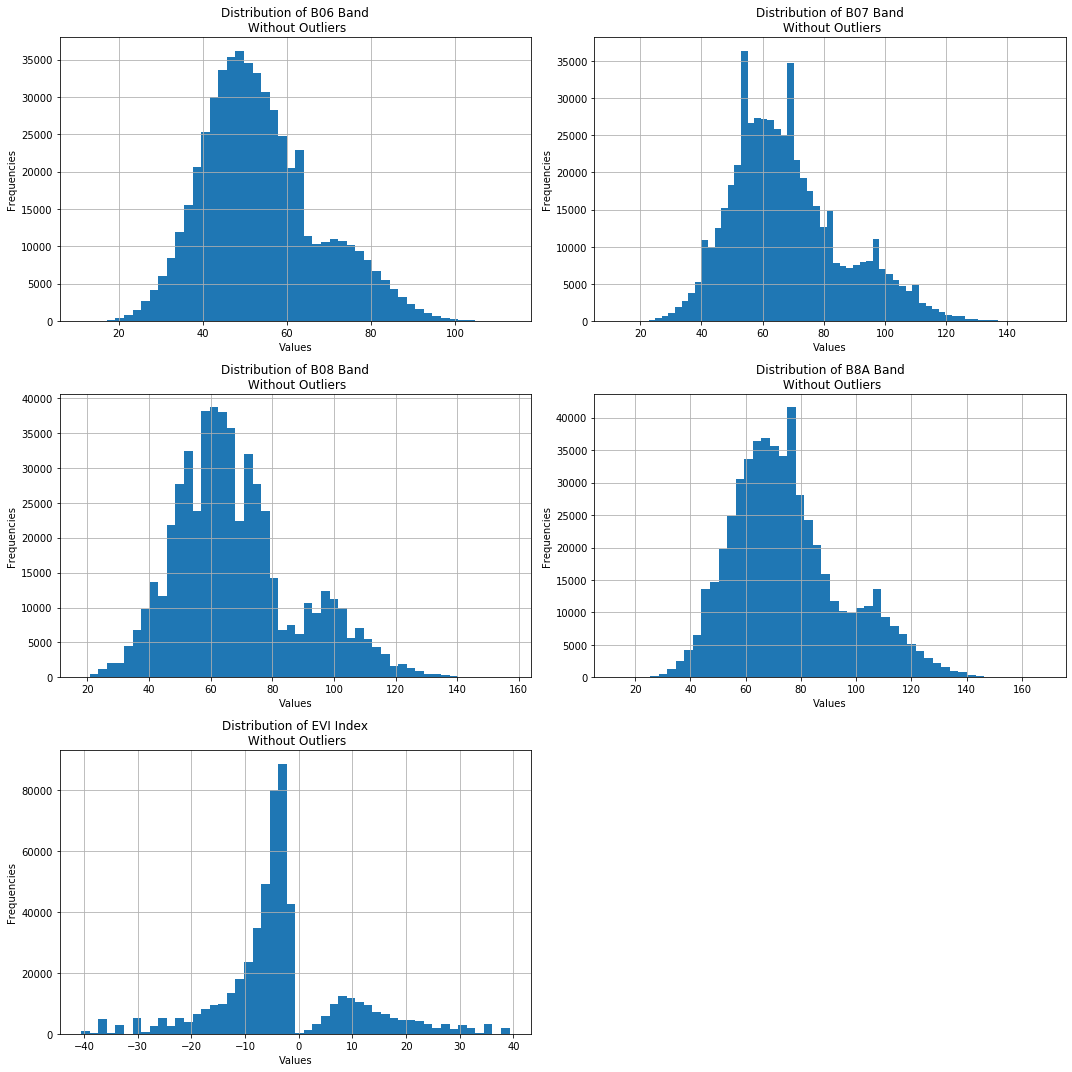

In [19]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches((15,15))
ax[0,0] = subset_data['B06'].hist(bins=50,ax=ax[0,0])
ax[0,0].set_title('Distribution of B06 Band\n Without Outliers')
ax[0,0].set_xlabel('Values')
ax[0,0].set_ylabel('Frequencies')

ax[0,1] = subset_data['B07'].hist(bins=65,ax=ax[0,1])
ax[0,1].set_title('Distribution of B07 Band\n Without Outliers')
ax[0,1].set_xlabel('Values')
ax[0,1].set_ylabel('Frequencies')

ax[1,0] = subset_data['B08'].hist(bins=50,ax=ax[1,0])
ax[1,0].set_title('Distribution of B08 Band\n Without Outliers')
ax[1,0].set_xlabel('Values')
ax[1,0].set_ylabel('Frequencies')

ax[1,1] = subset_data['B8A'].hist(bins=50,ax=ax[1,1])
ax[1,1].set_title('Distribution of B8A Band\n Without Outliers')
ax[1,1].set_xlabel('Values')
ax[1,1].set_ylabel('Frequencies')

ax[2,0] = subset_data['EVI'].hist(bins=50,ax=ax[2,0])
ax[2,0].set_title('Distribution of EVI Index\n Without Outliers')
ax[2,0].set_xlabel('Values')
ax[2,0].set_ylabel('Frequencies')

ax[2,1].axis('off')
fig.savefig('Bi-Modals.png')
fig.tight_layout()

Since the CC Red, CC Green, LAI, and PSRI features have a lot of points at one end of the range of values, below shows what they look like ignoring these clumps.

The color corrected Green value has a peak around 30 and also has a high density of values around the level of 0. What isn't shown in the plot below (but is shown in the histogram matrix above) is that there is alot of color corrected green values of 0.

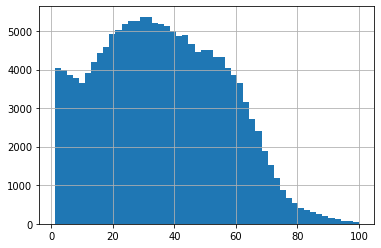

In [20]:
pd.Series(data['CC Green'][data['CC Green'].between(1,100)]**1).hist(bins=50)
plt.savefig('CC Green Dist.png')

The color corrected Red value has a peak around 18 and also has a high density of values around the level of 0. What isn't shown in the plot below (but is shown in the histogram matrix above) is that there is alot of color corrected red values of 0. <br>

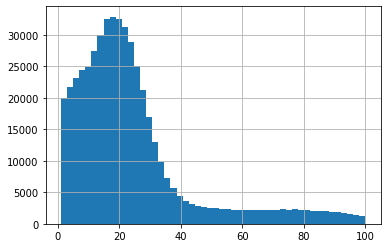

In [21]:
pd.Series(data['CC Red'][data['CC Red'].between(1,100)]**1).hist(bins=50)
plt.savefig('CC Red Dist.png')

The Leaf Area index has a mode at about 225, but also has a mode at 255 (this highest value possible). I think that the mode at 255 is due to heavily forested areas having a maxed out LAI value. I interpret this as there being a mode of heavily forested areas, and a mode of medium forested areas.

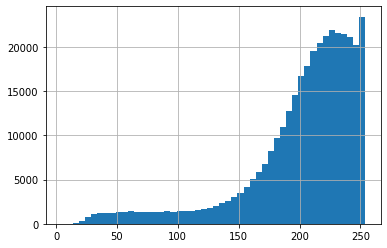

In [22]:
pd.Series(data['LAI'][data['LAI'] < 255]**1).hist(bins=50)
plt.savefig('LAI Dist.png')

The PSRI index has a large mode at a value of 0 (there are a ton of pixels with a value of 0 not shown here) and then the distribution tapers off as shown below.

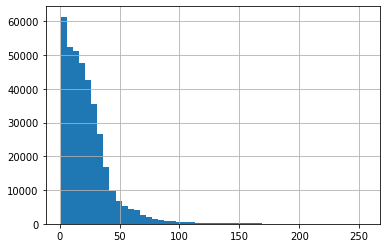

In [23]:
pd.Series(data['PSRI'][data['PSRI'] > 0]**1).hist(bins=50)
plt.savefig('PSRI Dist.png')

## Principle Component Analysis

Since there are too many features to visualize all together, I will perform principle component analysis to bring the feature space down from 23 features to 2 features and plot them.

Since the clustering algorithms are very sensitive to the scaling of the data, I want to try using both Standard Scaler and Min Max Scaling for computing the principle components and then determining which one seems to work the best.

In [24]:
features.remove('CC Blue')

In [25]:
#getting rid of the n/a values
subset_data = subset_data.dropna()

In [26]:
subset_data.shape

(535601, 35)

In [27]:
#scaling the data using Standard Scaler
scaling = StandardScaler()
scaling.fit(subset_data[features])
scaled = scaling.transform(subset_data[features])

#scaling the data using MinMax Scaler
scaling_minmax = MinMaxScaler()
scaling_minmax.fit(subset_data[features])
scaled_minmax = scaling_minmax.transform(subset_data[features])

In [28]:
#doing the PCA for the Standard Scaled Data
pca = PCA(n_components = 15)
pca = pca.fit(scaled)
components = pca.transform(scaled)

#doing the PCA for the MinMax Scaled Data
pca_minmax = PCA(n_components = 15)
pca_minmax = pca_minmax.fit(scaled_minmax)
components_minmax = pca_minmax.transform(scaled_minmax)

In [29]:
#getting the incremental explained variance
#for standard scaled
pca_var = pca.explained_variance_ratio_
exp_var = [0]
for i in pca_var:
    exp_var.append(exp_var[-1]+i)
    
#for minmax scaled
pca_var_minmax = pca_minmax.explained_variance_ratio_
exp_var_minmax = [0]
for i in pca_var_minmax:
    exp_var_minmax.append(exp_var_minmax[-1]+i)

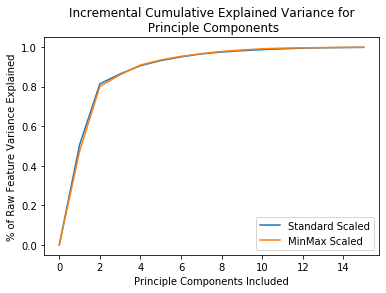

In [30]:
#plotting the cumulative explained variances
plt.plot(range(len(pca_var)+1),exp_var,label='Standard Scaled')
plt.plot(range(len(pca_var_minmax)+1),exp_var_minmax,label='MinMax Scaled')
plt.title('Incremental Cumulative Explained Variance for\n Principle Components')
plt.xlabel('Principle Components Included')
plt.ylabel('% of Raw Feature Variance Explained')
plt.legend()
plt.savefig('PCA Exp Var Plot.png')

All sets of priciple components cumulative explained variance plots appear to flatten out after 8 components, acheiving 97.4% of the original information, but it isn't until 13 components that the line really looks dead flat (acheiving 99.6% of the original information). I could get away with only using 8 components, but I'd like to be conservative and use 13.

Now I will create density plots when plotting the first two principle components for each set of scaling.

In [31]:
component_densities = sat_utils.density(pd.DataFrame(components),75,75)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


In [32]:
component_densities_minmax = sat_utils.density(pd.DataFrame(components_minmax),75,75)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


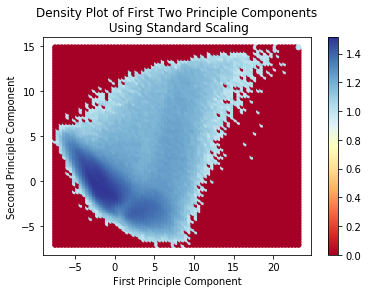

In [33]:
cm = plt.cm.get_cmap('RdYlBu')

sc = plt.scatter(component_densities['i'],component_densities['j'],c=component_densities['Counts']**.05,s=25, cmap=cm)
plt.colorbar(sc)
plt.title("Density Plot of First Two Principle Components\n Using Standard Scaling")
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.savefig('Standard PCA.png')
plt.show()

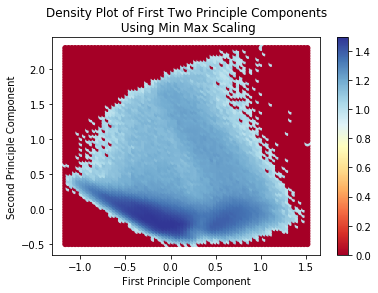

In [34]:
cm = plt.cm.get_cmap('RdYlBu')

sc_minmax = plt.scatter(component_densities_minmax['i'],component_densities_minmax['j'],c=component_densities_minmax['Counts']**.05,s=25, cmap=cm)
plt.colorbar(sc_minmax)
plt.title("Density Plot of First Two Principle Components\n Using Min Max Scaling")
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.savefig('MinMax PCA.png')
plt.show()

I really like the impact that using MinMax Scaler has on the visualization of the first two principle componenets. Both show two main clusters of density (as shown by the dark blue). However, the advantage of the MinMax Scaler components is that there is slightly lower density surrounding these two areas (as shown by the slightly lighter shade of blue surrounding the two clusters).

## Write the new data with no outliers to a csv

In [35]:
subset_data.loc[:300000,:].to_csv('Data/Data No Outliers1.csv')
subset_data.loc[300001:,:].to_csv('Data/Data No Outliers2.csv')

In [36]:
zipfile.ZipFile('Data/Data No Outliers1.zip','w',zipfile.ZIP_DEFLATED).write('Data/Data No Outliers1.csv')
zipfile.ZipFile('Data/Data No Outliers2.zip','w',zipfile.ZIP_DEFLATED).write('Data/Data No Outliers2.csv')